In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn
import seaborn as sns

In [2]:
heart = pd.read_csv("SAheart.data")
heart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [3]:
heart.famhist.replace(to_replace=['Present', 'Absent'], value=[1, 0], inplace=True)

In [4]:
heart.drop(['row.names'], axis=1, inplace=True)
heart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


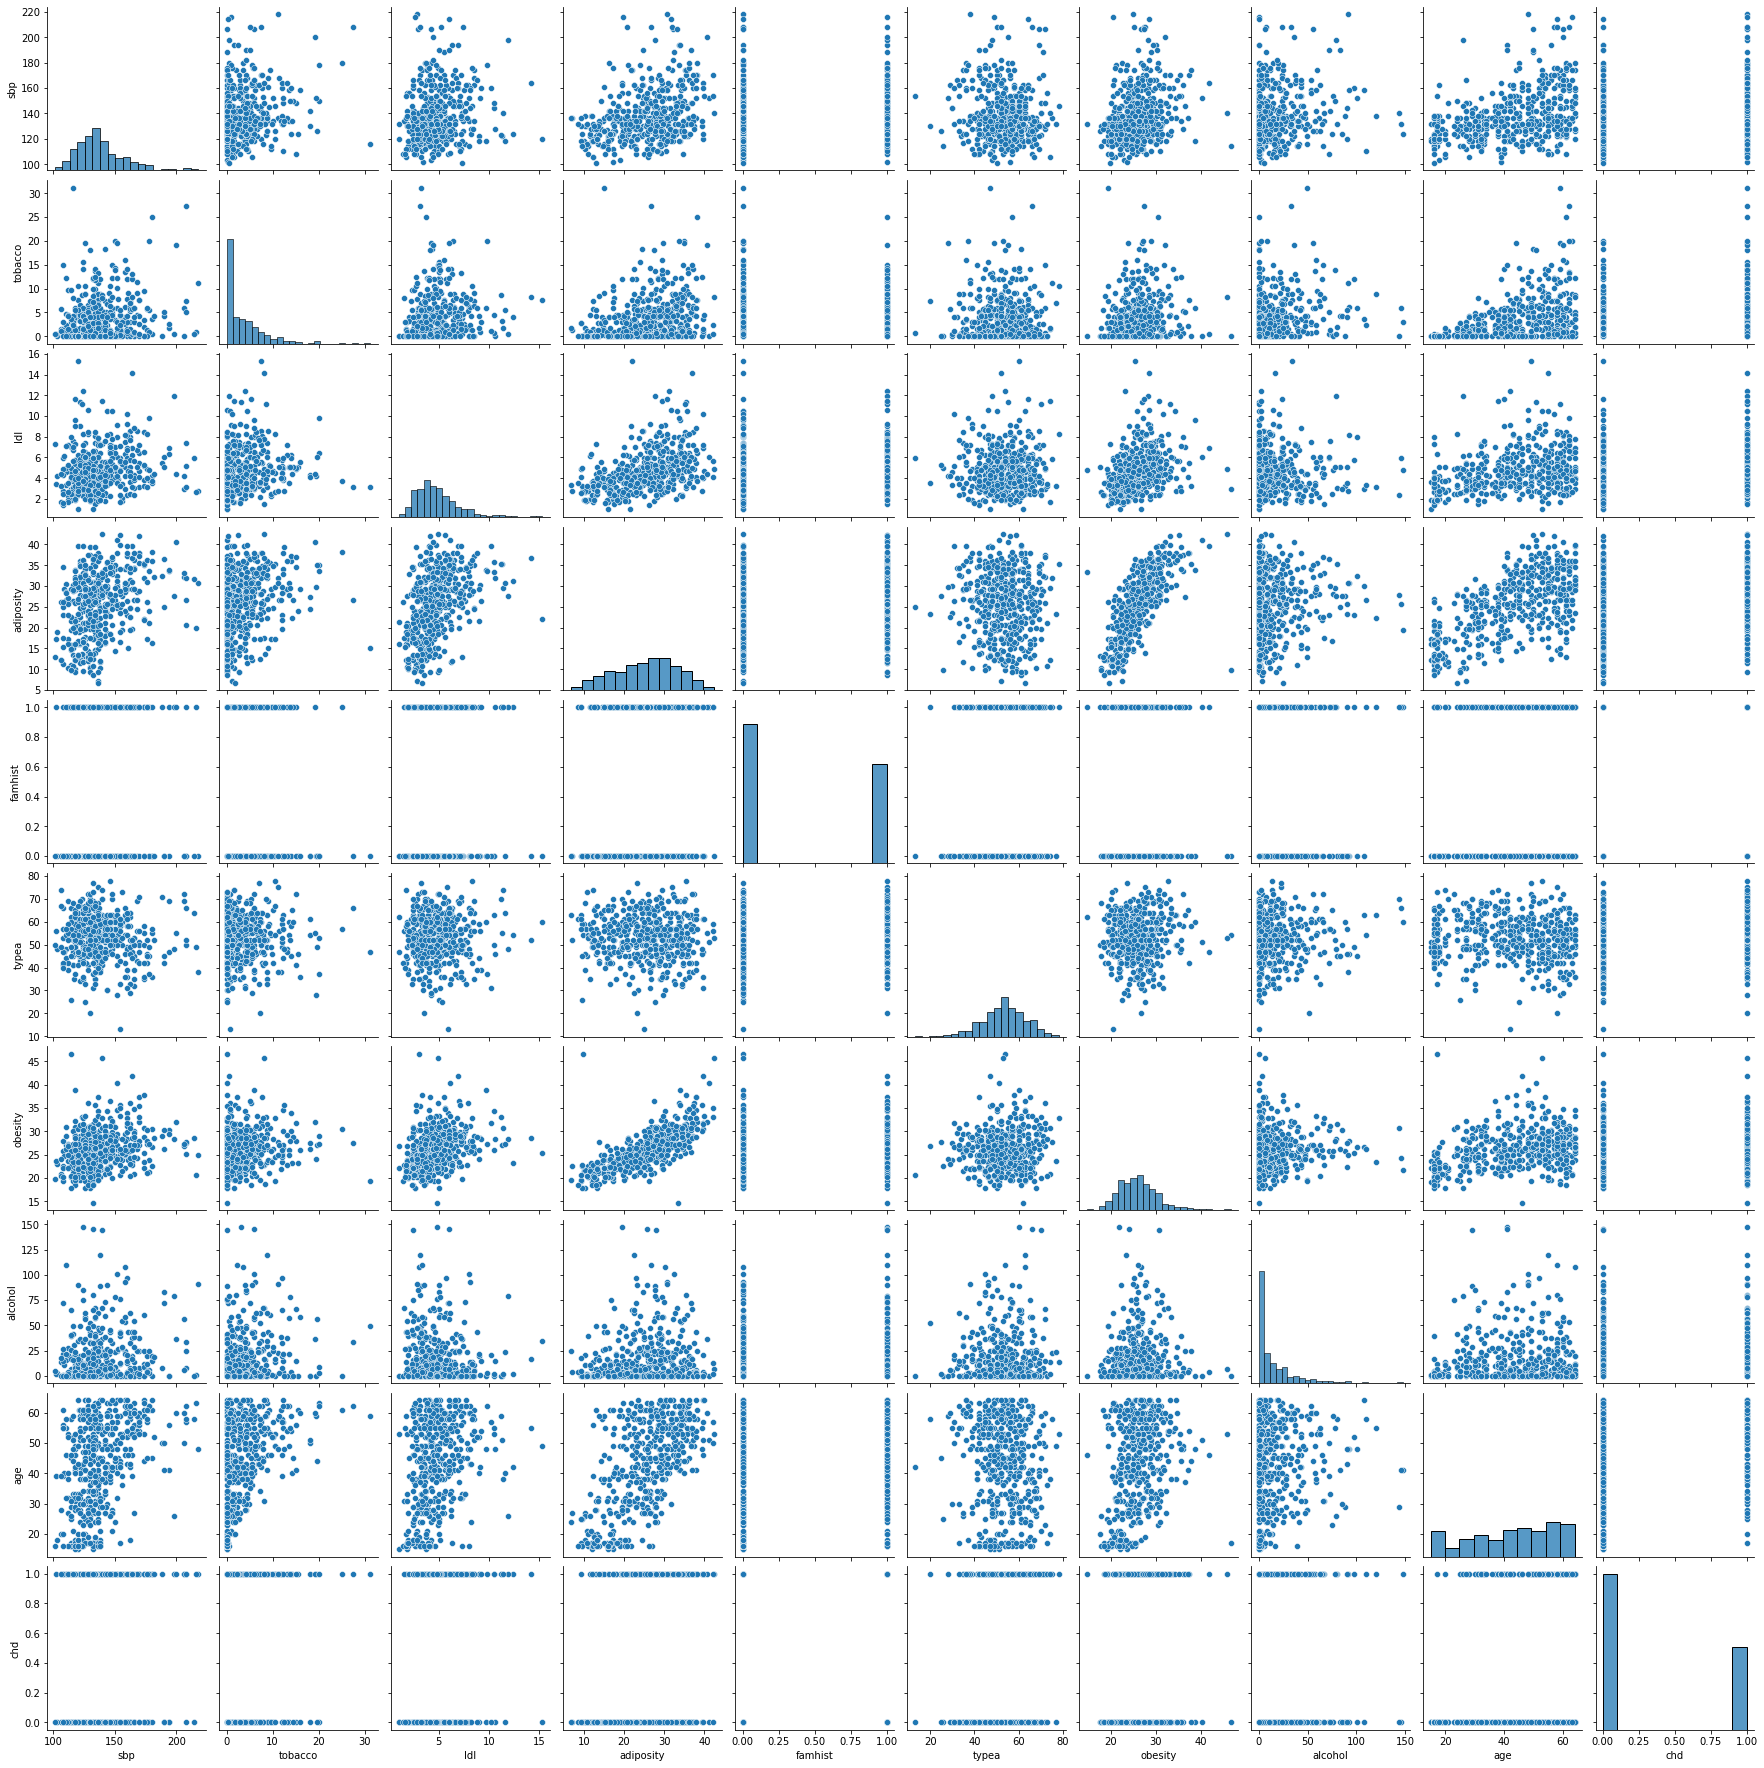

In [5]:
sns.pairplot(heart)

In [6]:
heart.iloc[:,list(range(5)) + [9]]

,sbp,tobacco,ldl,adiposity,famhist,chd
0,160,12.00,5.73,23.11,1,1
1,144,0.01,4.41,28.61,0,1
2,118,0.08,3.48,32.28,1,0
3,170,7.50,6.41,38.03,1,1
4,134,13.60,3.50,27.78,1,1
...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,0
458,182,4.20,4.41,32.10,0,1
459,108,3.00,1.59,15.23,0,0
460,118,5.40,11.61,30.79,0,0


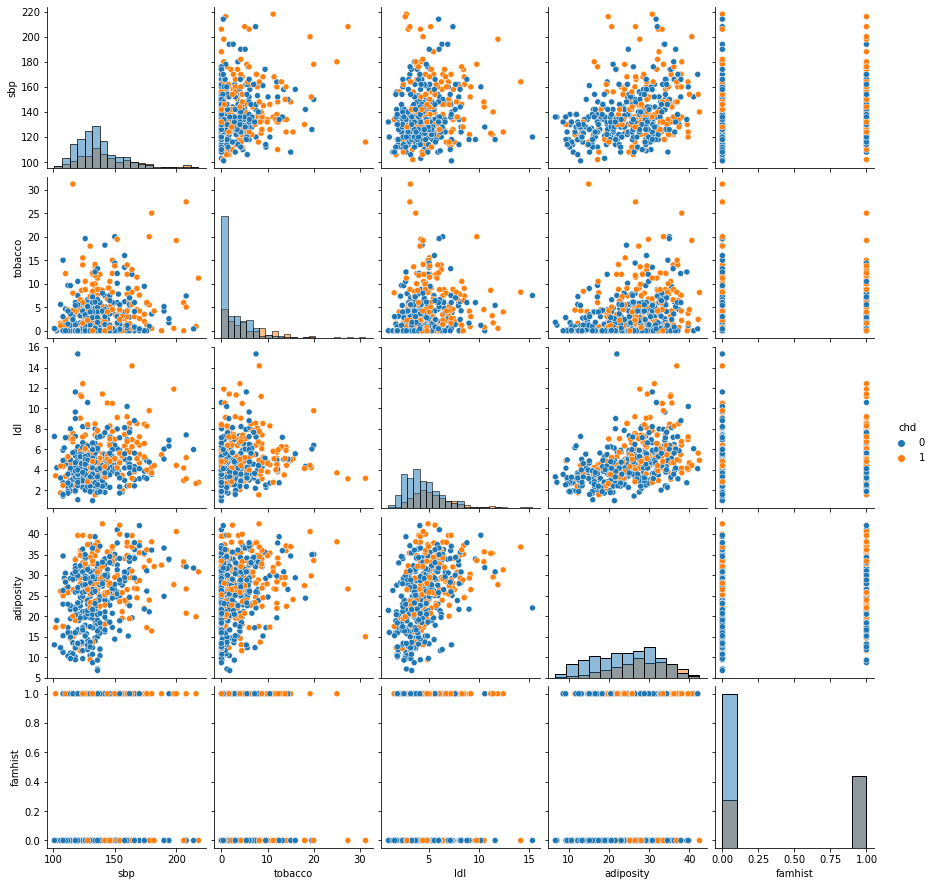

In [7]:
sns.pairplot(heart.iloc[:, list(range(5)) + [9]], hue="chd", diag_kind="hist")

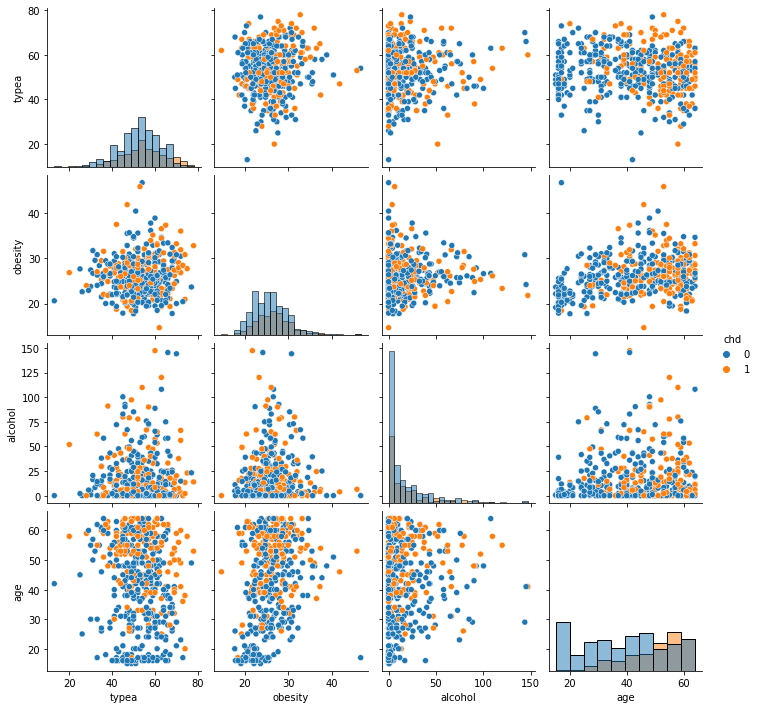

In [8]:
sns.pairplot(heart.iloc[:, list(range(5, 9)) + [9]], hue="chd", diag_kind="hist")

In [9]:
X = heart.iloc[:, :-1]
X

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40


In [10]:
y = heart.iloc[:, -1]
y

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
181,152,0.00,6.06,41.05,1,51,40.34,0.00,51
439,130,4.00,2.40,17.42,0,60,22.05,0.00,40
141,130,2.78,4.89,9.39,1,63,19.30,17.47,25
368,126,3.40,4.87,15.16,1,65,22.01,11.11,38
244,126,4.60,7.40,31.99,1,57,28.67,0.37,60
...,...,...,...,...,...,...,...,...,...
106,108,1.50,4.33,24.99,0,66,22.29,21.60,61
270,130,0.00,4.16,39.43,1,46,30.01,0.00,55
348,130,0.08,5.59,25.42,1,50,24.98,6.27,43
435,136,0.00,1.77,20.37,0,45,21.51,2.06,16


In [13]:
y_train

181    0
439    0
141    1
368    0
244    1
      ..
106    1
270    1
348    1
435    0
102    0
Name: chd, Length: 309, dtype: int64

In [14]:
X_train.drop(['famhist'], axis=1)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
181,152,0.00,6.06,41.05,51,40.34,0.00,51
439,130,4.00,2.40,17.42,60,22.05,0.00,40
141,130,2.78,4.89,9.39,63,19.30,17.47,25
368,126,3.40,4.87,15.16,65,22.01,11.11,38
244,126,4.60,7.40,31.99,57,28.67,0.37,60
...,...,...,...,...,...,...,...,...
106,108,1.50,4.33,24.99,66,22.29,21.60,61
270,130,0.00,4.16,39.43,46,30.01,0.00,55
348,130,0.08,5.59,25.42,50,24.98,6.27,43
435,136,0.00,1.77,20.37,45,21.51,2.06,16


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [16]:
lda = LDA()

In [17]:
lda.fit(X_train.drop(['famhist'], axis=1), y_train)

LinearDiscriminantAnalysis()

In [18]:
y_pred = lda.predict(X_test.drop(['famhist'], axis=1))

In [19]:
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)

[[80 17]
 [29 27]]


In [20]:
np.mean(y_test != y_pred)

0.3006535947712418

In [21]:
err_lda  = 1 - sum(np.diag(perf)) / float(len(y_test)) 
err_lda

0.30065359477124187

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [23]:
qda = QDA()

In [24]:
qda.fit(X_train.drop(['famhist'], axis=1), y_train)

QuadraticDiscriminantAnalysis()

In [25]:
y_pred = qda.predict(X_test.drop(['famhist'], axis=1))

In [26]:
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)

[[78 19]
 [33 23]]


In [27]:
np.mean(y_test != y_pred)

0.33986928104575165

In [28]:
err_qda  = 1 - sum(np.diag(perf)) / float(len(y_test)) 
err_qda

0.33986928104575165

In [29]:
# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [32]:
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)

[[73 24]
 [22 34]]


In [33]:
np.mean(y_test != y_pred)

0.3006535947712418

In [34]:
err_nb = 1 - sum(np.diag(perf)) / float(len(y_test)) 
err_nb

0.30065359477124187

In [35]:
# Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [38]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [39]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [40]:
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)

[[85 12]
 [26 30]]


In [41]:
np.mean(y_test != y_pred)

0.24836601307189543

In [42]:
err_logreg = 1 - sum(np.diag(perf)) / float(len(y_test)) 
err_logreg

0.24836601307189543

In [43]:
print(err_lda, err_qda, err_nb, err_logreg)

0.30065359477124187 0.33986928104575165 0.30065359477124187 0.24836601307189543


[Text(0, 0, 'err_lda'),
 Text(1, 0, 'err_qda'),
 Text(2, 0, 'err_nb'),
 Text(3, 0, 'err_logreg')]

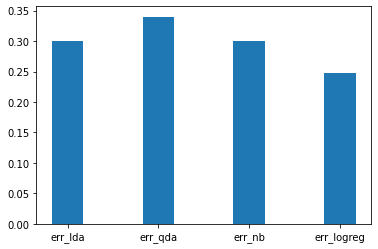

In [44]:
fig, ax = plt.subplots()
labels = ['err_lda', 'err_qda', 'err_nb', 'err_logreg']
err_list = [err_lda, err_qda, err_nb, err_logreg]
x = np.arange(len(labels))  # the label locations
width = 0.35
ax.bar(x, err_list, width)
ax.set_xticks(x)
ax.set_xticklabels(labels)

In [45]:
# 100 replications

In [46]:
M = 100
ERR = np.zeros((M, 4))

In [47]:
for i in range(M):
    if((i + 1) % 20 == 0):
        print(i + 1)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.33)
    
    lda = LDA()
    lda.fit(X_train.drop(['famhist'], axis=1), y_train)
    y_pred = lda.predict(X_test.drop(['famhist'], axis=1))
    ERR[i, 0] = np.mean(y_test != y_pred)
    
    qda = QDA()
    qda.fit(X_train.drop(['famhist'], axis=1), y_train)
    y_pred = qda.predict(X_test.drop(['famhist'], axis=1))
    ERR[i, 1] = np.mean(y_test != y_pred)
    
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    ERR[i, 2] = np.mean(y_test != y_pred)
    
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    ERR[i, 3] = np.mean(y_test != y_pred) 

20
40
60
80
100


[Text(1, 0, 'err_lda'),
 Text(2, 0, 'err_qda'),
 Text(3, 0, 'err_nb'),
 Text(4, 0, 'err_logreg')]

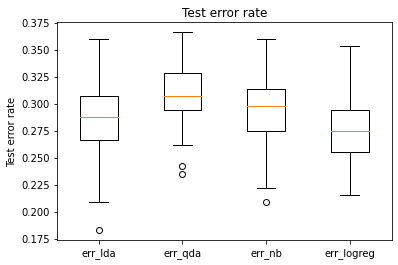

In [48]:
fig, ax = plt.subplots()
ax.set_title('Test error rate')
ax.set_ylabel('Test error rate')
ax.boxplot(ERR)
labels = ['err_lda', 'err_qda', 'err_nb', 'err_logreg']
ax.set_xticklabels(labels)

In [49]:
# Q4
# Plot of ROC curves

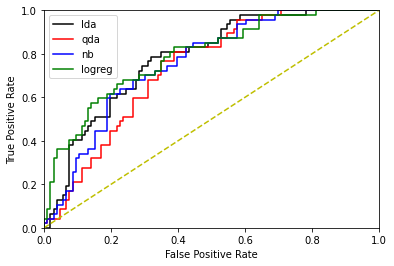

In [50]:
lda = LDA()
lda.fit(X_train.drop(['famhist'], axis=1), y_train)
preds = lda.predict_proba(X_test.drop(['famhist'], axis=1))[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, preds)
plt.plot(fpr, tpr, 'black', label='lda')

qda = QDA()
qda.fit(X_train.drop(['famhist'], axis=1), y_train)
preds = qda.predict_proba(X_test.drop(['famhist'], axis=1))[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, preds)
plt.plot(fpr, tpr, 'red', label='qda')

nb = GaussianNB()
nb.fit(X_train, y_train)
preds = nb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, preds)
plt.plot(fpr, tpr, 'blue', label='nb')

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
preds = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, preds)
plt.plot(fpr, tpr, 'green', label='logreg')

plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend()


In [51]:
#--------- Part II: Vowel data -------------

# Q1

In [52]:
vowel = pd.read_csv("vowel.data", header=None, delim_whitespace=True)

In [53]:
vowel.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,1
1,-3.653,0.373,-0.600,1.705,-0.222,1.765,-0.353,0.537,-0.797,-0.813,1
2,-3.665,0.337,-0.641,1.791,-0.194,1.686,-0.359,0.570,-0.676,-0.841,1
3,-3.624,0.305,-0.708,1.758,-0.194,1.675,-0.273,0.561,-0.577,-0.843,1
4,-3.593,0.290,-0.782,1.707,-0.175,1.662,-0.137,0.493,-0.492,-0.926,1


In [54]:
vowel.rename(columns={10: 'class'}, inplace=True)

In [55]:
vowel.head()

,0,1,2,3,4,5,6,7,8,9,class
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,1
1,-3.653,0.373,-0.600,1.705,-0.222,1.765,-0.353,0.537,-0.797,-0.813,1
2,-3.665,0.337,-0.641,1.791,-0.194,1.686,-0.359,0.570,-0.676,-0.841,1
3,-3.624,0.305,-0.708,1.758,-0.194,1.675,-0.273,0.561,-0.577,-0.843,1
4,-3.593,0.290,-0.782,1.707,-0.175,1.662,-0.137,0.493,-0.492,-0.926,1


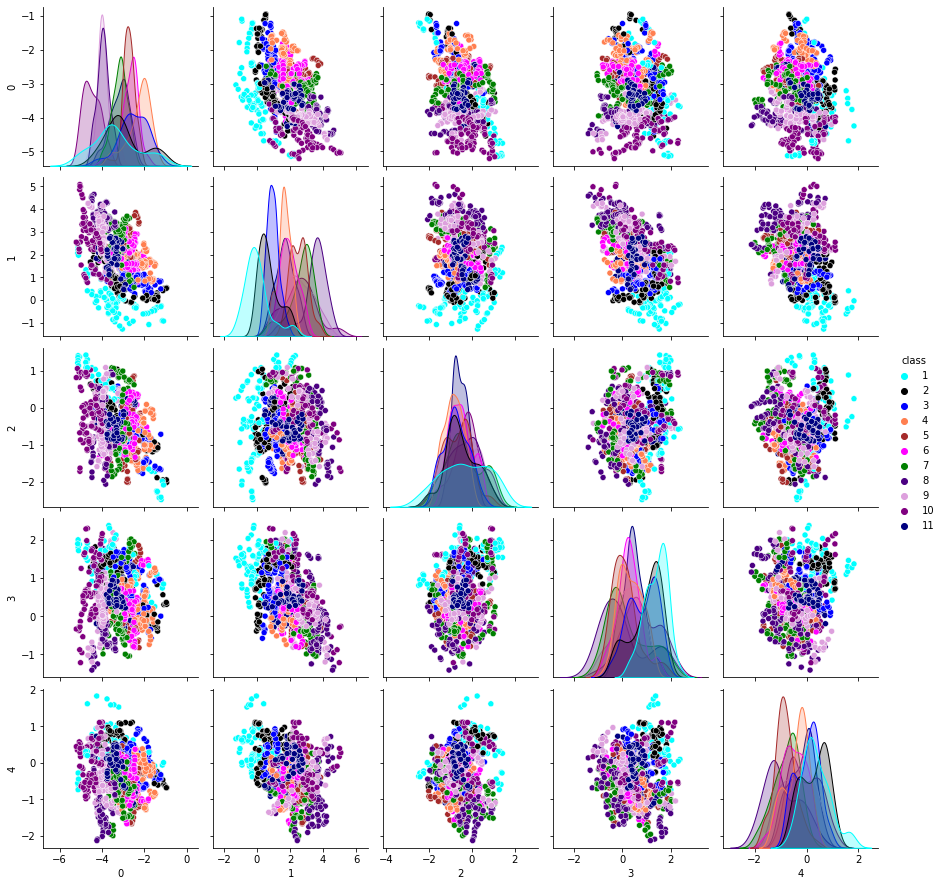

In [56]:
palette = ['aqua', 'black', 'blue', 'coral', 'brown', 
           'fuchsia', 'green', 'indigo', 'plum', 'purple', 'navy']
sns.pairplot(vowel.iloc[:, list(range(5)) + [10]], hue="class", palette=palette)

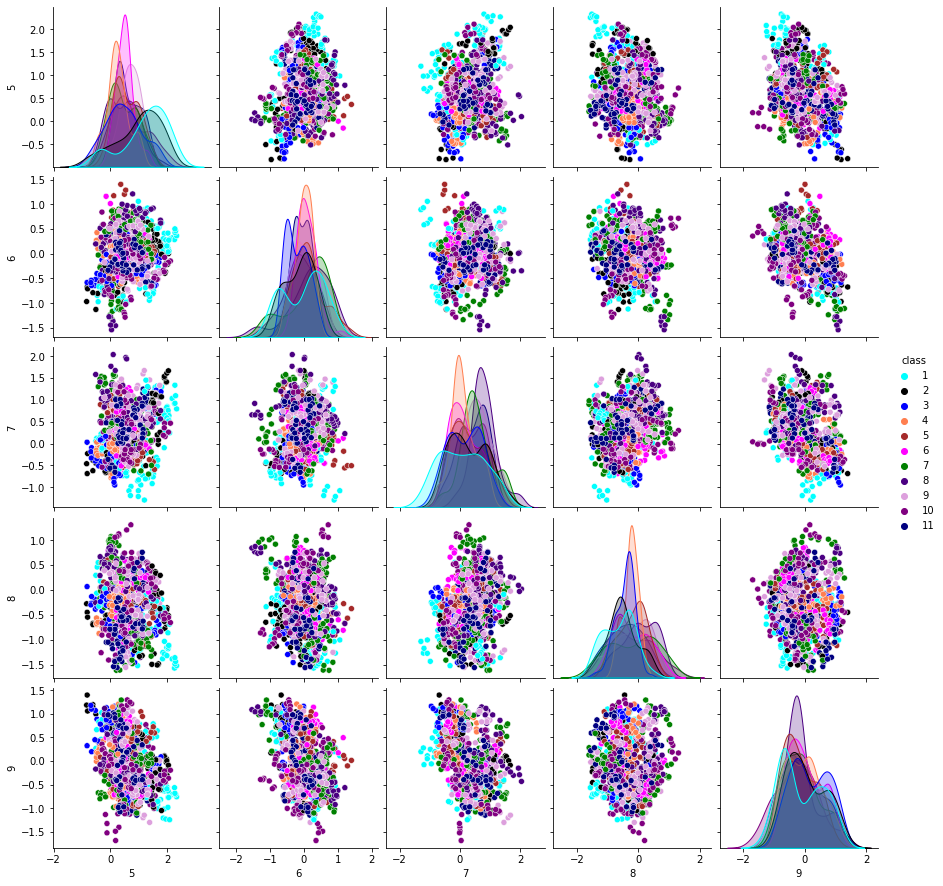

In [57]:
sns.pairplot(vowel.iloc[:, list(range(5, 10)) + [10]], hue="class", palette=palette)

In [58]:
vowel.shape

(990, 11)

In [59]:
n = vowel.shape[1]
n

11

In [60]:
X = vowel.iloc[:, :-1]
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,-3.653,0.373,-0.600,1.705,-0.222,1.765,-0.353,0.537,-0.797,-0.813
2,-3.665,0.337,-0.641,1.791,-0.194,1.686,-0.359,0.570,-0.676,-0.841
3,-3.624,0.305,-0.708,1.758,-0.194,1.675,-0.273,0.561,-0.577,-0.843
4,-3.593,0.290,-0.782,1.707,-0.175,1.662,-0.137,0.493,-0.492,-0.926


In [61]:
y = vowel.iloc[:, -1]
y

0       1
1       1
2       1
3       1
4       1
       ..
985    11
986    11
987    11
988    11
989    11
Name: class, Length: 990, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)
err_lda = np.mean(y_test != y_pred)
assert(err_lda == 1 - sum(np.diag(perf)) / float(len(y_test)))
print(err_lda)

[[25  0  0  0  0  0  0  0  0  1  0]
 [ 7 18  9  0  0  0  0  0  0  0  0]
 [ 0  1 20  5  0  0  0  0  0  0  0]
 [ 0  0  1 13  0  4  0  0  0  0  0]
 [ 0  0  0  2 18  9  8  0  0  0  0]
 [ 0  0  1  7  3  9  3  0  0  0  3]
 [ 0  0  3  0 13  1 19  4  1  0  0]
 [ 0  0  0  0  0  0  1 19  7  0  2]
 [ 0  1  0  0  0  0  0  5 13  1  2]
 [ 4  3  1  0  0  0  0  2 11 13  2]
 [ 0  0  0  3  0  5  0  0  0  0 24]]
0.41590214067278286


In [64]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)
err_qda = np.mean(y_test != y_pred)
print(err_qda)
print(1 - sum(np.diag(perf)) / float(len(y_test)))
assert(np.round(err_qda, 5) == 
       np.round(1 - sum(np.diag(perf)) / float(len(y_test)), 5))

[[24  2  0  0  0  0  0  0  0  0  0]
 [ 0 32  2  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  1 17  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  9  1  0  0  0  0]
 [ 0  0  0  0  1 22  0  0  0  0  3]
 [ 0  0  0  0  4  0 36  1  0  0  0]
 [ 0  0  0  0  0  0  2 25  2  0  0]
 [ 0  0  0  0  0  0  0  4 18  0  0]
 [ 0  3  0  0  0  0  0  0  0 31  2]
 [ 0  0  0  0  0  1  1  0  1  0 29]]
0.12232415902140673
0.1223241590214067


In [65]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)
err_nb = np.mean(y_test != y_pred)
print(err_nb)
print(1 - sum(np.diag(perf)) / float(len(y_test)))
assert(np.round(err_nb, 5) == 
       np.round(1 - sum(np.diag(perf)) / float(len(y_test)), 5))

[[23  2  0  0  0  0  0  0  0  1  0]
 [ 6 25  2  0  0  0  0  0  0  0  1]
 [ 0  5 17  3  0  0  0  0  0  0  1]
 [ 0  0  1 14  0  3  0  0  0  0  0]
 [ 0  0  0  0 24  4  9  0  0  0  0]
 [ 0  0  0  0  5 18  0  0  1  0  2]
 [ 1  0  0  0 16  0 17  5  2  0  0]
 [ 0  0  0  0  0  0  4 18  4  3  0]
 [ 0  1  0  0  0  0  1  5 13  2  0]
 [ 1  5  0  0  0  0  0  0  8 21  1]
 [ 0  0  0  0  2  8  1  0  2  2 17]]
0.3669724770642202
0.3669724770642202


In [66]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)
err_logreg = np.mean(y_test != y_pred)
print(err_logreg)
print(1 - sum(np.diag(perf)) / float(len(y_test)))
assert(np.round(err_logreg, 5) == 
       np.round(1 - sum(np.diag(perf)) / float(len(y_test)), 5))

[[25  0  0  0  0  0  0  0  0  1  0]
 [ 7 18  9  0  0  0  0  0  0  0  0]
 [ 0  2 20  3  0  0  0  0  0  0  1]
 [ 0  0  0 15  0  3  0  0  0  0  0]
 [ 0  0  0  0 16 11 10  0  0  0  0]
 [ 0  0  1  4  2 12  2  0  0  0  5]
 [ 0  0  4  0 14  0 17  4  2  0  0]
 [ 1  0  0  0  0  0  1 18  9  0  0]
 [ 0  1  0  0  0  0  1  4 10  3  3]
 [ 0  0  4  0  0  0  0  1  8 22  1]
 [ 0  1  0  3  0  5  2  0  2  0 19]]
0.41284403669724773
0.4128440366972477


In [67]:
print(np.array([err_lda,err_qda,err_nb,err_logreg]))

[0.41590214 0.12232416 0.36697248 0.41284404]


In [68]:
M = 10
ERR = np.zeros((M, 4))

In [69]:
for i in range(M):
    if((i + 1) % 2 == 0):
        print(i + 1)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.33)
    
    lda = LDA()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    ERR[i, 0] = np.mean(y_test != y_pred)
    
    qda = QDA()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)
    ERR[i, 1] = np.mean(y_test != y_pred)
    
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    ERR[i, 2] = np.mean(y_test != y_pred)
    
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    ERR[i, 3] = np.mean(y_test != y_pred) 

2
4
6
8
10


[Text(1, 0, 'err_lda'),
 Text(2, 0, 'err_qda'),
 Text(3, 0, 'err_nb'),
 Text(4, 0, 'err_logreg')]

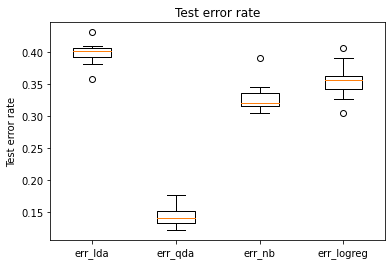

In [70]:
fig, ax = plt.subplots()
ax.set_title('Test error rate')
ax.set_ylabel('Test error rate')
ax.boxplot(ERR)
labels = ['err_lda', 'err_qda', 'err_nb', 'err_logreg']
ax.set_xticklabels(labels)